In [1]:
from ast import literal_eval
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/matches.csv')

In [3]:
df.head()

,match_id,date,year_month,map,w1,w2,w3,w4,l1,l2,...,w4_nr,l1_or,l2_or,l3_or,l4_or,l1_nr,l2_nr,l3_nr,l4_nr,map_only
0,1061564,2024-11-06,2024-11,Golden Lakes (Random civs),Saracen,Shadeslayer II,FraGStaR,billuboss,MrWrong,TRush,...,134,1405,694,669,600,1388,677,652,583,Golden Lakes
1,1061535,2024-11-06,2024-11,Hideout (Random civs),Saracen,TRush,newisyou,adirath,MrWrong,Ju$TK!Dd!nG,...,600,1428,942,524,480,1405,919,501,457,Hideout
2,1061516,2024-11-06,2024-11,Rage Forest (Random civs),Saracen,Shadeslayer II,TRush,Garam Aadmi,KhalDrogo,Ju$TK!Dd!nG,...,480,1612,960,664,595,1594,942,646,577,Rage Forest
3,1061497,2024-11-06,2024-11,Golden Pit,RedViper,Ju$TK!Dd!nG,newisyou,adirath,Saracen,Shadeslayer II,...,595,1437,1342,673,482,1417,1322,653,462,Golden Pit
4,1061471,2024-11-06,2024-11,Team Acropolis (Random civs),RedViper,THUNDER,Ju$TK!Dd!nG,adirath,Saracen,Shadeslayer II,...,575,1455,1360,691,662,1437,1342,673,644,Team Acropolis


In [4]:
df.groupby(['year_month'])['match_id'].count().sort_index()

year_month
2022-01    240
2022-02    384
2022-03    219
2022-04    208
2022-05    215
2022-06    197
2022-07    148
2022-08    198
2022-09    292
2022-10    285
2022-11    226
2022-12    165
2023-01    176
2023-02    158
2023-03    326
2023-04    329
2023-05    329
2023-06    318
2023-07    347
2023-08    355
2023-09    364
2023-10    311
2023-11    260
2023-12    482
2024-01    379
2024-02    236
2024-03    239
2024-04    234
2024-05    330
2024-06    275
2024-07    247
2024-08    322
2024-09    257
2024-10    338
2024-11     58
Name: match_id, dtype: int64

In [25]:
df.groupby('map_only')['match_id'].count().sort_values(ascending=False)

map_only
Others               1522
Arena                 731
African Clearing      699
Runestones            673
Hideout               628
Arabia                600
Nomad                 564
Oasis                 479
4 Lakes               412
Land Nomad            390
Ghost Lake            371
Kawasan               316
Golden Pit            316
Valley                289
Mega Random           287
Black Forest          222
Enclosed              221
Steppe                195
Rage Forest           194
Beduoins              171
Regicide Fortress     167
Name: match_id, dtype: int64

In [6]:
df.groupby('map')['match_id'].count().sort_values(ascending=False).head(20)

map
Hideout (Random civs)             605
African Clearing (Random civs)    595
Arena (Random civs)               553
Nomad (Random civs)               539
Runestones (Random civs)          500
Arabia                            457
Oasis (Random civs)               449
4 Lakes (Random civs)             410
Land Nomad (Random civs)          390
Golden Pit                        316
Ghost Lake                        300
Valley                            289
Mega Random (Random civs)         287
Kawasan (Random civs)             255
Enclosed (Random civs)            214
Black Forest (Random civs)        212
Rage Forest (Random civs)         194
Arena                             178
Runestones                        173
Golden Lakes (Random civs)        167
Name: match_id, dtype: int64

In [7]:
player = 'TheLivi'
player = 'Plan B'
player = 'Mirror'
player = 'Thiru'
player = 'Kappa'
player = 'TalentButNoFarm'
player = 'Saracen'
player = 'Sephiroth'
player = 'DOOMSTER'
player = 'HELLRAZER'
player = 'addu'
player = 'Sargun'
player = 'Shadeslayer II'
player = 'Valar'
player = 'Water'
player = '🥭bush'
player = 'SuLTaN'
player = 'Just🅱an'
player = 'MODI'
player = 'Blitz'
player = 'newisyou'
player = 'Bondulkar'
player = 'ForeRuthless'
player = 'RedViper'

player = 'Phantom'
player = 'Thiru'

In [8]:
def player_map_stats(player):
    won_games = df[(df['w1'] == player) | (df['w2'] == player)  | (df['w3'] == player) | (df['w4'] == player)].\
            groupby('map')['match_id'].count().sort_values(ascending=False).reset_index()
    lost_games = df[(df['l1'] == player) | (df['l2'] == player)  | (df['l3'] == player) | (df['l4'] == player)].\
            groupby('map')['match_id'].count().sort_values(ascending=False).reset_index()

    results = won_games.merge(lost_games, on='map').rename(columns={'match_id_x': 'won', 'match_id_y': 'lost'})
    results['total'] = results['won'] + results['lost']
    results = results[['map', 'total', 'won', 'lost']]
    results['win_rate'] = round(results['won'] / results['total'] * 100, 2)
    print(results[['total', 'won', 'lost']].sum(), round(results['won'].sum() / results['total'].sum() * 100, 2))
    return results[results['total'] >= 1].sort_values(by='win_rate', ascending=False).reset_index(drop=True)

In [9]:
player_map_stats(player)

total    692
won      342
lost     350
dtype: int64 49.42


,map,total,won,lost,win_rate
0,Oasis,4,3,1,75.00
1,Arena (Random civs),35,26,9,74.29
2,Steppe,11,8,3,72.73
3,Serengeti,3,2,1,66.67
4,Regicide Fortress,9,6,3,66.67
5,Atacama,3,2,1,66.67
6,Valley,34,22,12,64.71
7,Hideout,5,3,2,60.00
8,Kawasan (Random civs),12,7,5,58.33
9,Hyper Random (Random civs),12,7,5,58.33


In [10]:
min(df['year_month']), max(df['year_month'])

('2022-01', '2024-11')

In [11]:
# skeleton column of all months
all_months = ('2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', 
              '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', 
              '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', 
              '2023-07', '2023-08', '2023-09', '2023-10', '2023-11')
all_months_df = pd.DataFrame(all_months, columns=['year_month'])

player_matches = df[(df['w1'] == player) | (df['w2'] == player)  | (df['w3'] == player) | (df['w4'] == player) |
    (df['l1'] == player) | (df['l2'] == player)  | (df['l3'] == player) | (df['l4'] == player)]
matches_by_month = player_matches.groupby(['year_month'])['match_id'].count().sort_index().rename('matches played')

matches_by_month = all_months_df.merge(matches_by_month.reset_index(), how='left').\
    fillna(0).set_index('year_month')['matches played'].astype(int)
matches_by_month

year_month
2022-01    50
2022-02    65
2022-03    66
2022-04    21
2022-05    61
2022-06    37
2022-07     6
2022-08     4
2022-09     1
2022-10     3
2022-11     3
2022-12     4
2023-01     3
2023-02     3
2023-03    54
2023-04     9
2023-05    35
2023-06     2
2023-07     0
2023-08     0
2023-09    11
2023-10     2
2023-11    20
Name: matches played, dtype: int64

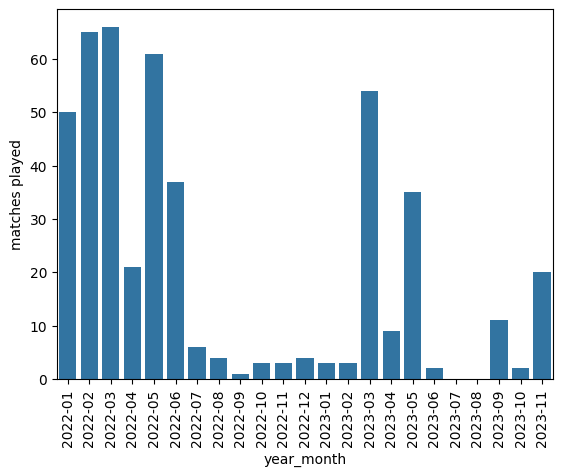

In [12]:
sns.barplot(matches_by_month)
plt.xticks(rotation=90);


In [13]:
df.groupby(['year_month', 'map'])['match_id'].count().sort_index

<bound method Series.sort_index of year_month  map                            
2022-01     4 Lakes (Random civs)               4
            African Clearing                   20
            African Clearing (Random civs)     21
            Alpine Lakes                        1
            Arabia                             15
                                               ..
2024-11     Regicide Fortress (Random civs)     1
            Runestones (Random civs)            3
            Steppe (Random civs)                2
            Team Acropolis (Random civs)        3
            Valley                              2
Name: match_id, Length: 1092, dtype: int64>

In [14]:
top_maps = df.groupby('map_only')['match_id'].count().sort_values(ascending=False).head(20).index

In [15]:
top_maps

Index(['Arena', 'African Clearing', 'Runestones', 'Hideout', 'Arabia', 'Nomad',
       'Oasis', '4 Lakes', 'Land Nomad', 'Ghost Lake', 'Kawasan', 'Golden Pit',
       'Valley', 'Mega Random', 'Black Forest', 'Enclosed', 'Steppe',
       'Rage Forest', 'Beduoins', 'Regicide Fortress'],
      dtype='object', name='map_only')

In [16]:
# map_stats = df[df['map_only'].isin(top_maps)].\
#         groupby(['year_month', 'map_only'])['match_id'].count().\
#         reset_index().rename(columns={'match_id': 'count'})

In [17]:
df['map'] = df['map'].apply(lambda x: x if x in top_maps else "Others")
df['map_only'] = df['map_only'].apply(lambda x: x if x in top_maps else "Others")

In [18]:
df.groupby('map_only')['match_id'].count()

map_only
4 Lakes               412
African Clearing      699
Arabia                600
Arena                 731
Beduoins              171
Black Forest          222
Enclosed              221
Ghost Lake            371
Golden Pit            316
Hideout               628
Kawasan               316
Land Nomad            390
Mega Random           287
Nomad                 564
Oasis                 479
Others               1522
Rage Forest           194
Regicide Fortress     167
Runestones            673
Steppe                195
Valley                289
Name: match_id, dtype: int64

In [19]:
map_stats = df.\
        groupby(['year_month', 'map_only'])['match_id'].count().\
        reset_index().rename(columns={'match_id': 'count'})

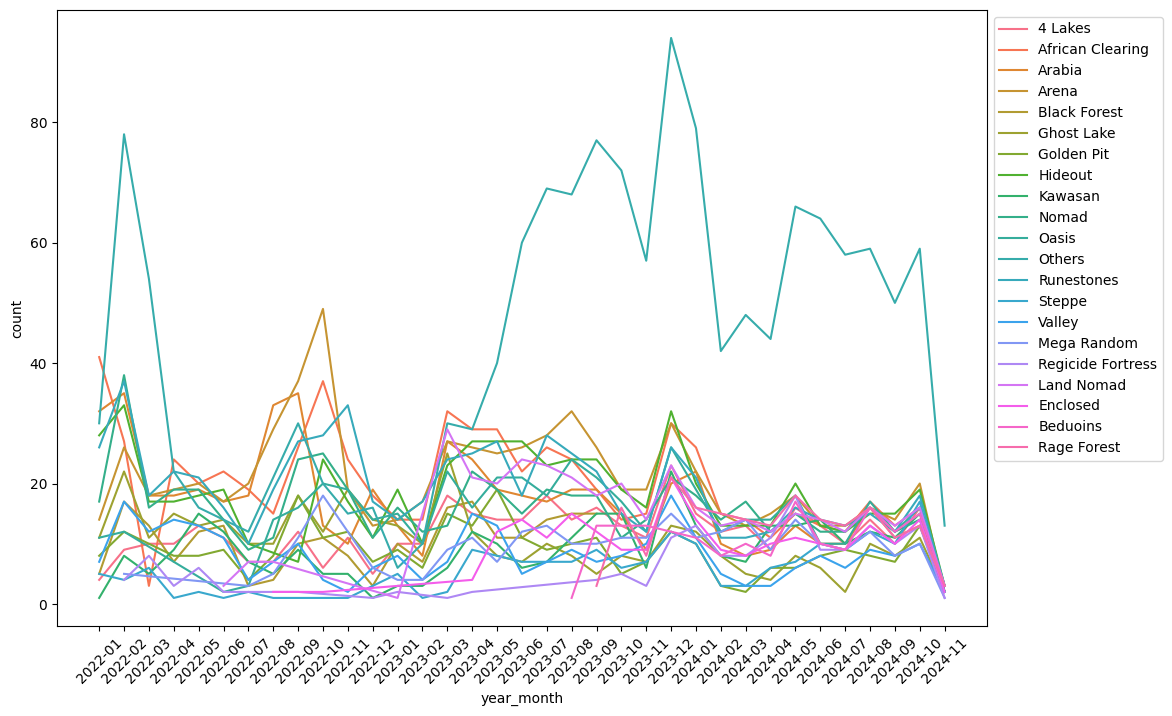

In [20]:
plt.figure(figsize=(12,8))
p = sns.lineplot(data=map_stats, x='year_month', y='count', hue='map_only')
plt.legend(loc='upper right')
p.legend(bbox_to_anchor = (1, 1))
plt.xticks(rotation=45);

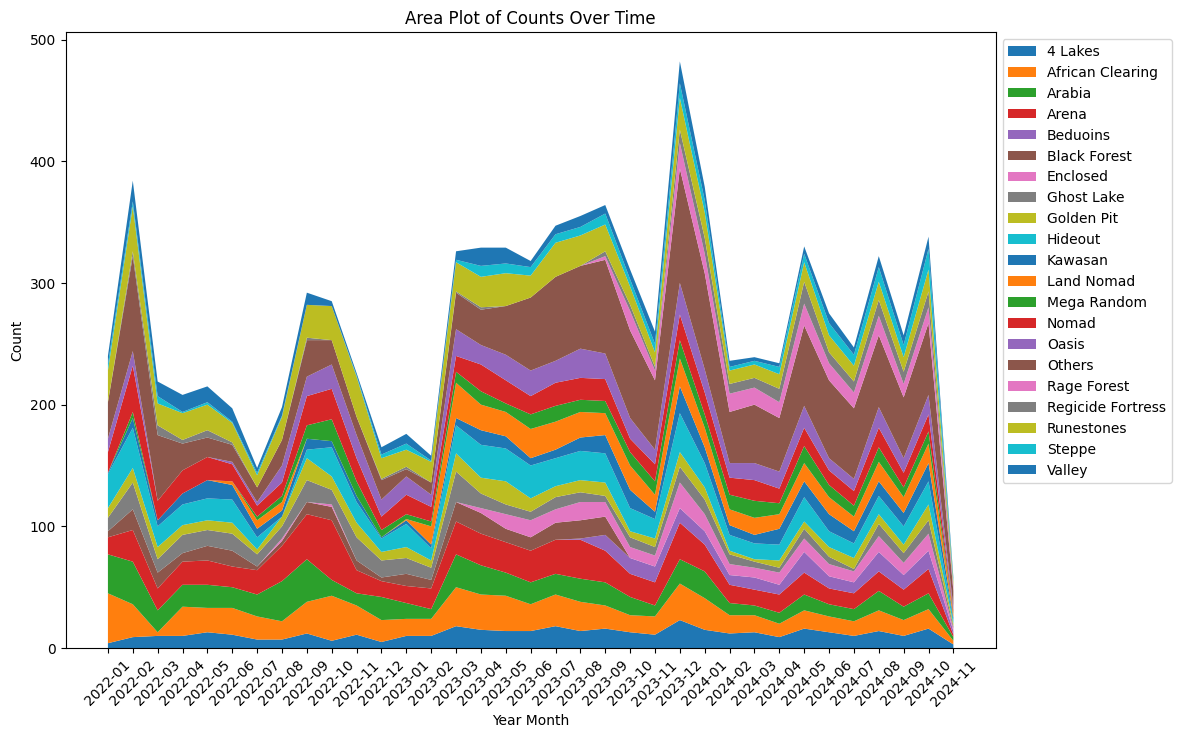

In [21]:
pivot_data = map_stats.pivot(index='year_month', columns='map_only', values='count').fillna(0)

plt.figure(figsize=(12, 8))

# Create an area plot using stackplot
plt.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.xlabel('Year Month')
plt.ylabel('Count')
plt.title('Area Plot of Counts Over Time')

plt.show()

In [22]:
map_count = df.groupby('map_only')['match_id'].count()

In [23]:
map_count

map_only
4 Lakes               412
African Clearing      699
Arabia                600
Arena                 731
Beduoins              171
Black Forest          222
Enclosed              221
Ghost Lake            371
Golden Pit            316
Hideout               628
Kawasan               316
Land Nomad            390
Mega Random           287
Nomad                 564
Oasis                 479
Others               1522
Rage Forest           194
Regicide Fortress     167
Runestones            673
Steppe                195
Valley                289
Name: match_id, dtype: int64

In [27]:
sorted(pivot_data_fraction.columns, key=lambda x: map_count[x], reverse=True)

['Others',
 'Arena',
 'African Clearing',
 'Runestones',
 'Hideout',
 'Arabia',
 'Nomad',
 'Oasis',
 '4 Lakes',
 'Land Nomad',
 'Ghost Lake',
 'Golden Pit',
 'Kawasan',
 'Valley',
 'Mega Random',
 'Black Forest',
 'Enclosed',
 'Steppe',
 'Rage Forest',
 'Beduoins',
 'Regicide Fortress']

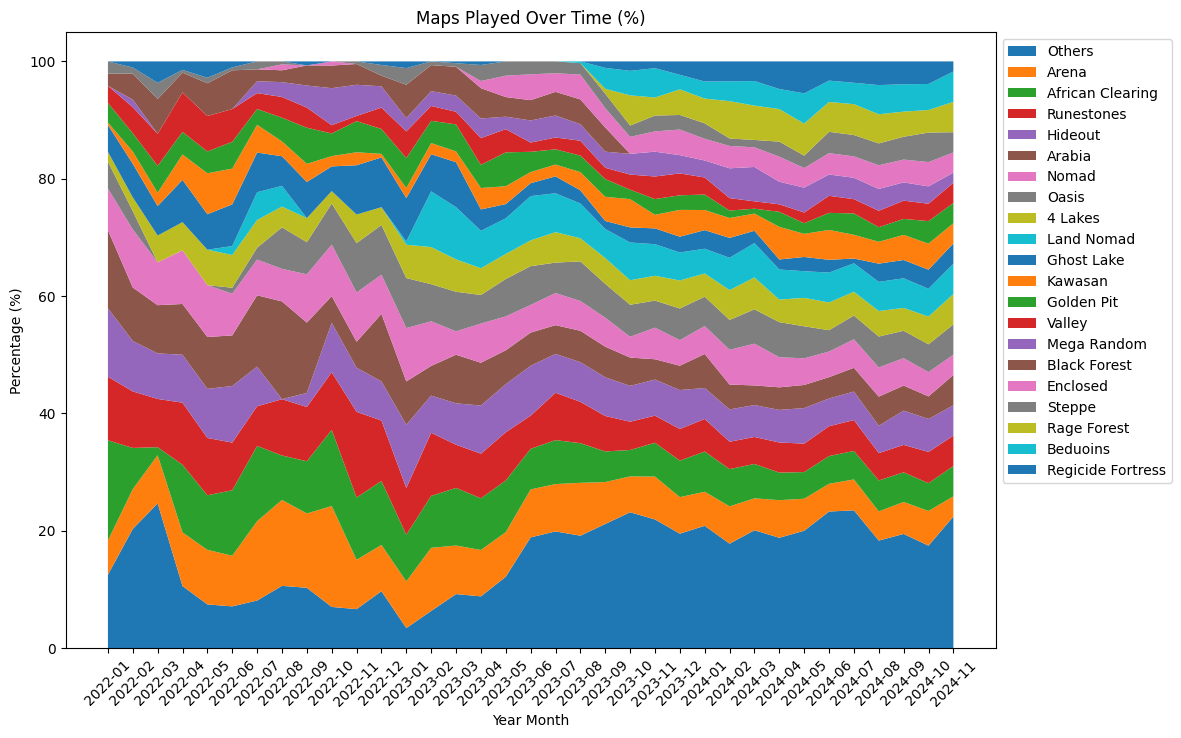

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming map_stats is a DataFrame
# Create pivot table for stackplot
pivot_data = map_stats.pivot(index='year_month', columns='map_only', values='count').fillna(0)
map_count = df.groupby('map_only')['match_id'].count()

# Normalize the data to make the total area always at 100%
pivot_data_fraction = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
sorted_columns = map_count.sort_values(ascending=False).index
pivot_data_fraction = pivot_data_fraction[sorted_columns]

plt.figure(figsize=(12, 8))

# Create an area plot using stackplot
plt.stackplot(pivot_data_fraction.index, pivot_data_fraction.T, labels=pivot_data_fraction.columns)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.xlabel('Year Month')
plt.ylabel('Percentage (%)')
plt.title('Maps Played Over Time (%)')

plt.show()


In [ ]:
# date_skeleton = pd.DataFrame(pd.date_range(min(player_df['date']), max(player_df['date']), freq='d').astype('str'), columns=['date'])
# plot = sns.lineplot(data=date_skeleton.merge(player_df, on='date', how='left'), x='date', y='player_rating')
# for ind, label in enumerate(plot.get_xticklabels()):
#     if ind % 28 == 0:  # every 28th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)
# plt.xticks(rotation=90);
# st.pyplot(plot.get_figure())
